In [1]:
%pip install tensorflow
%pip install python-mnist
%pip install keras
%pip install numpy
%pip install MNIST
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.




In [2]:
# Import the installed libraries to ensure they're available
import tensorflow as tf
import keras

# Print TensorFlow and Keras version to confirm the installation
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.1.1


In [3]:
#pip install tensorflow

In [4]:
#pip install python-mnist

In [5]:
#pip install mnist.loader

In [9]:
import tensorflow as tf

#from fg import freeze_graph

import numpy as np
from mnist import MNIST

mndata = MNIST('data')

X_train, y_train = mndata.load("C:/Users/HCAG/Downloads/gzip/emnist-mnist-train-images-idx3-ubyte",
                             "C:/Users/HCAG/Downloads/gzip/emnist-mnist-train-labels-idx1-ubyte")
X_test, y_test = mndata.load("C:/Users/HCAG/Downloads/gzip/emnist-mnist-test-images-idx3-ubyte",
                             "C:/Users/HCAG/Downloads/gzip/emnist-mnist-test-labels-idx1-ubyte")

X_train = np.array(X_train)/ 255.0 
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Getting Data ready for pre-processing

In [10]:
#Converting 1D array to 2D array suitable for neural network training
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


<function matplotlib.pyplot.show(close=None, block=None)>

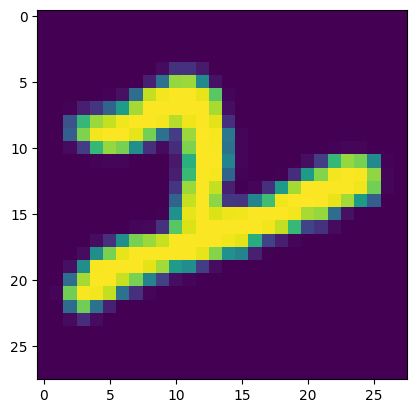

In [11]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0]) #plotting 2D images
plt.show

In [12]:
m = X_train[0]
print(m)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

60000
Done


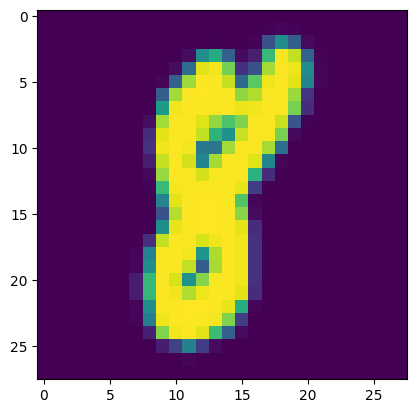

In [13]:
#for train data
#transforming data to set orientation
print(len(X_train))
for t in range(len(X_train)):
    X_train[t] = np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0])
plt.show

#for test data  
for t in range(len(X_test)):
    X_test[t] = np.transpose(X_test[t])
    

#checking
plt.imshow(X_test[1])
plt.show

print('Done')

<function matplotlib.pyplot.show(close=None, block=None)>

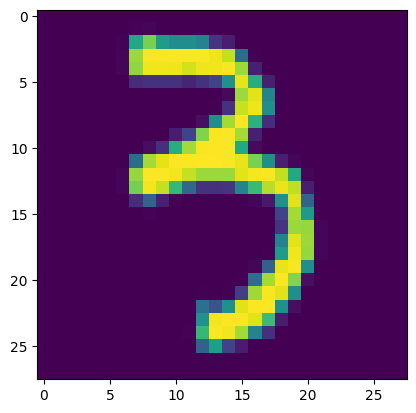

In [14]:
m = X_train[58000]
plt.imshow(m)
plt.show

### Reshaping train and test data again for input into model
X_train and X_test are reshaped to have a new shape where each sample has dimensions (784, 1).
784 represents the number of features (pixels) in each sample, and 1 represents that each pixel is considered as a separate channel. This is often required for compatibility with convolutional neural networks (CNNs) in Keras.

In [15]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

### Creation of model

In [16]:
#pip install keras

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, Input
from keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical

def load_idx(file_path):
    with open(file_path, 'rb') as f:
        magic, num_items = np.fromfile(f, dtype=np.dtype('>i4'), count=2)
        if magic == 2051:  # Magic number for images
            num_rows, num_cols = np.fromfile(f, dtype=np.dtype('>i4'), count=2)
            data = np.fromfile(f, dtype=np.uint8).reshape(num_items, num_rows, num_cols, 1)
        elif magic == 2049:  # Magic number for labels
            data = np.fromfile(f, dtype=np.uint8)
        else:
            raise ValueError("File not recognized!")
    return data

# Replace these paths with the actual paths to your dataset files
train_images_path = "C:/Users/HCAG/Downloads/gzip/emnist-mnist-train-images-idx3-ubyte"
train_labels_path = "C:/Users/HCAG/Downloads/gzip/emnist-mnist-train-labels-idx1-ubyte"
test_images_path = "C:/Users/HCAG/Downloads/gzip/emnist-mnist-test-images-idx3-ubyte"
test_labels_path = "C:/Users/HCAG/Downloads/gzip/emnist-mnist-test-labels-idx1-ubyte"


train_images = load_idx(train_images_path)
train_labels = load_idx(train_labels_path)
test_images = load_idx(test_images_path)
test_labels = load_idx(test_labels_path)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 62)
test_labels = to_categorical(test_labels, 62)

# Define the model
model = Sequential([
    Input(shape=(28,28,1)),  # Adjusted to match the reshaped input dimensions
    Convolution2D(32, (5,5), activation='relu', padding='same', kernel_constraint=max_norm(3)),
    Convolution2D(32, (5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu', kernel_constraint=max_norm(3)),
    Dropout(0.5),
    Dense(62, activation='softmax')  # Adjust the final layer to match the number of classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training of model and evaluation

In [19]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=5)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,418,078 (9.22 MB)

 Trainable params: 2,418,078 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.8654 - loss: 0.4622 - val_accuracy: 0.9862 - val_loss: 0.0431
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9845 - loss: 0.0513 - val_accuracy: 0.9883 - val_loss: 0.0367
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9914 - val_loss: 0.0250
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9928 - val_loss: 0.0221
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9915 - val_loss: 0.0247


In [20]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 99.15%


## Creating model history graphs

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


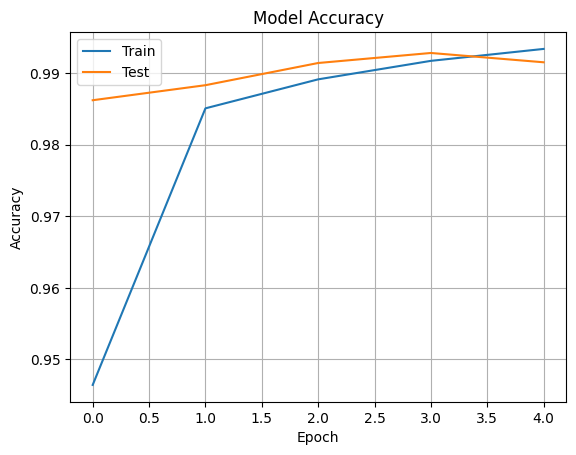

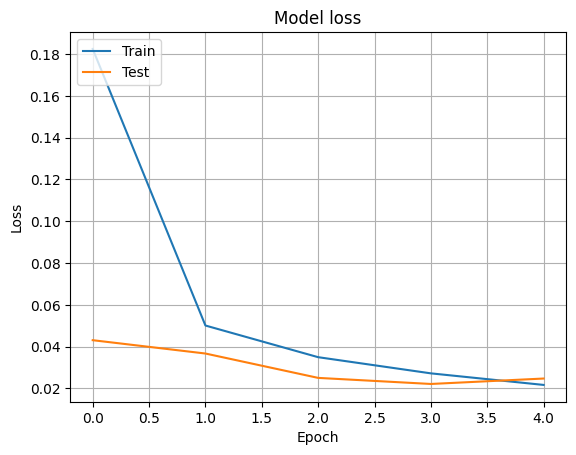

In [21]:
print(history.history.keys())#printing dictionary of metric keys
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

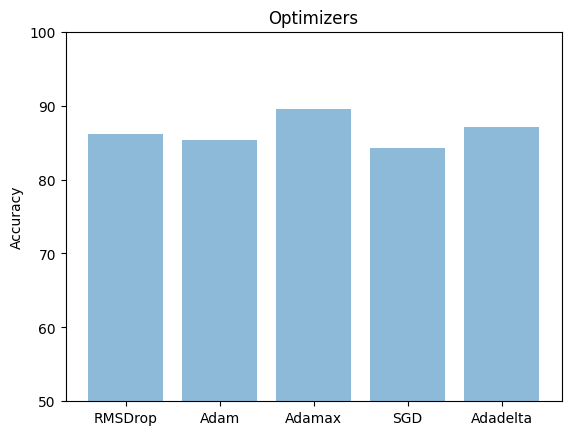

In [22]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta') #list of different optimizers
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()

## Predicting a single image using the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
prediction: [[9.99303579e-01 9.62216200e-06 9.30871101e-06 5.10092732e-08
  6.30310213e-04 1.09029563e-10 2.21542411e-08 2.40819736e-05
  2.14494066e-05 1.66315567e-06 1.17646476e-10 1.93479233e-10
  1.37586031e-09 5.85499774e-11 2.11360318e-10 7.05281389e-10
  8.87600660e-10 1.11088409e-10 1.24257860e-09 2.35280173e-09
  1.09822718e-09 7.07427561e-10 2.08771236e-10 2.32408901e-11
  1.61834740e-10 7.40144168e-10 2.89959640e-10 1.13233846e-10
  1.43046297e-10 1.49111043e-10 1.57401966e-10 1.20792959e-10
  1.36544151e-10 8.03872580e-10 2.80735268e-10 2.25510027e-10
  2.42687509e-10 5.08951270e-10 1.67191572e-09 3.32661731e-10
  3.11001641e-11 2.27862534e-10 1.13015923e-10 1.09440838e-10
  4.69725481e-10 3.73316072e-10 3.10245246e-10 6.24540808e-10
  8.30227553e-10 1.36239342e-09 4.12423012e-11 1.81946652e-10
  4.21918556e-10 2.43848441e-10 2.45486409e-10 3.30628663e-10
  2.23356000e-10 2.55833688e-11 3.63363437e-11 6.17049301e-10
  2.06644604e-10 2.0

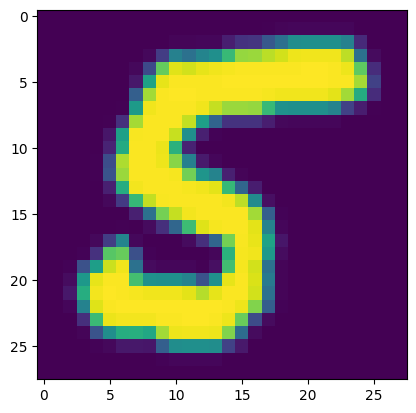

In [23]:
m = X_test[258].reshape(28,28)
plt.imshow(m)
plt.show
print('prediction: '+str(model.predict(X_test[258].reshape(1,28,28,1))))

## Saving the model

In [24]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("model.weights.h5")
# Creates a HDF5 file 'model.h5'